# **Financial Data Visualizer**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import urllib.request
import json
from datetime import datetime
import ssl
context = ssl._create_unverified_context()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Monetary Base**

In [2]:
# ---------------- Monetary Base Data ----------------
def get_MBC_from_HKMA():
    # Monetary Base Data released by hkma monthly
    url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/monetary-operation/monetary-base-endperiod?choose=end_of_month&from=1998-09&to=now&sortby=end_of_month&sortorder=asc'

    # retrieve data from hkma api, 100 entries per call, untill every data are retrieveed
    records = []
    offset = 0
    while True:
        with urllib.request.urlopen(url+"&offset="+str(offset), context=context) as req:
            data = json.loads(req.read().decode())
            records += data['result']['records']
        if data['result']['datasize'] <= 0:
            break
        else:
            offset += 100

    # now data retrieved from hkma are stored in 'records' in a chronological order
    return records

def MBC():
    records = get_MBC_from_HKMA()

    # prepare formattedX and formattedY to plot a stacked area graph
    formattedX = []
    formatted_cert_of_indebt = []
    formatted_gov_notes_coins_circulation = []
    formatted_aggr_balance_bf_disc_win = []
    formatted_outstanding_efbn = []
    formattedY = []

    for record in records:
        formattedX += [record['end_of_month']]
        # cert_of_indebt
        formatted_cert_of_indebt += [record['cert_of_indebt']]
        # gov_notes_coins_circulation
        formatted_gov_notes_coins_circulation += [
            record['gov_notes_coins_circulation']]
        # aggr_balance_bf_disc_win
        formatted_aggr_balance_bf_disc_win += [
            record['aggr_balance_bf_disc_win']]
        # outstanding_efbn
        formatted_outstanding_efbn += [record['outstanding_efbn']]

    formattedY = [formatted_cert_of_indebt,
                  formatted_gov_notes_coins_circulation,
                  formatted_aggr_balance_bf_disc_win,
                  formatted_outstanding_efbn]

    # Plot mbc
    plt.stackplot(
        formattedX,
        formattedY,
        labels=['cert_of_indebt',
                'gov_notes_coins_circulation',
                'aggr_balance_bf_disc_win',
                'outstanding_efbn']
    )
    plt.title("Monetary Base Composition")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formattedX[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

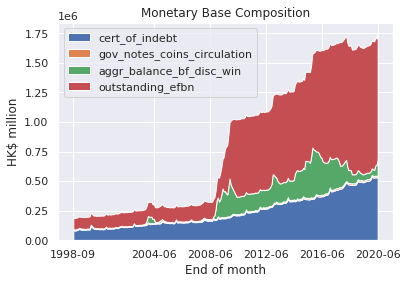

In [3]:
MBC()

### 1. Money Multiplier = M3 / MB (HKD)

In [4]:
# ---------------- 1. Money Multiplier = M3 / MB (HKD) ----------------
def get_MSA_from_HKMA():
    # Monetary Supply-Ddjusted
    url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/money/supply-adjusted?choose=end_of_month&from=1998-09&to=now&sortby=end_of_month&sortorder=asc'

    # retrieve data from hkma api, 100 entries per call, untill every data are retrieveed
    records = []
    offset = 0
    while True:
        with urllib.request.urlopen(url+"&offset="+str(offset), context=context) as req:
            data = json.loads(req.read().decode())
            records += data['result']['records']
        if data['result']['datasize'] <= 0:
            break
        else:
            offset += 100

    # now data retrieved from hkma are stored in 'records' in a chronological order
    return records

def MM():
    mbc_records = get_MBC_from_HKMA()
    msa_records = get_MSA_from_HKMA()

    syncLength = min(len(mbc_records), len(msa_records))
    mbc_records = mbc_records[:syncLength]  # mb_bf_disc_win_total
    msa_records = msa_records[:syncLength]  # m3_hkd

    formatted_X = []
    formatted_mm_Y = []
    formatted_m3_hkd_Y = []
    formatted_mb_total_Y = []

    for i in range(syncLength):
        mm = msa_records[i]['m3_hkd'] / mbc_records[i]['mb_bf_disc_win_total']
        end_of_month = msa_records[i]['end_of_month']
        
        if(not msa_records[i]['end_of_month'] == mbc_records[i]['end_of_month']):
            print("something wrong here, please check") # date sync check

        formatted_X += [end_of_month]
        formatted_mm_Y += [mm]
        formatted_m3_hkd_Y += [msa_records[i]['m3_hkd']]
        formatted_mb_total_Y += [mbc_records[i]['mb_bf_disc_win_total']]

    # Plot mm
    plt.plot(formatted_X, formatted_mm_Y, color='#990DAD', linewidth=4, alpha=0.7, label="money multiplier")
    plt.title("1. Money Multiplier = M3 / MB (HKD)")
    plt.xlabel("End of month")
    plt.ylabel("m3 to mb ratio")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

    # Plot m3
    plt.plot(formatted_X, formatted_m3_hkd_Y, color='#E30D55', linewidth=4, alpha=0.7, label="m3hkd")
    plt.title("M3 HKD")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()
    
    
    # Plot mb
    plt.plot(formatted_X, formatted_mb_total_Y, color='#6FE50E', linewidth=4, alpha=0.7, label="mbhkd")
    plt.title("Total Monetary Base before Discount Window")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

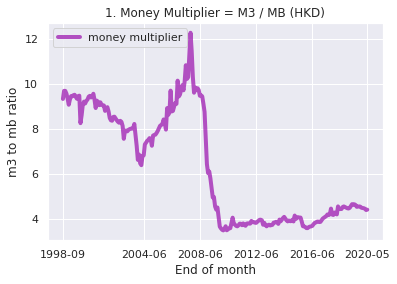

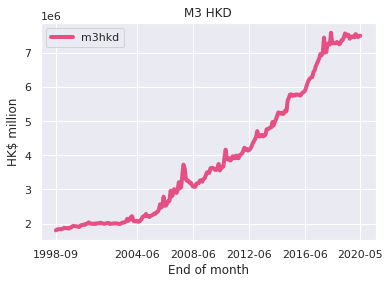

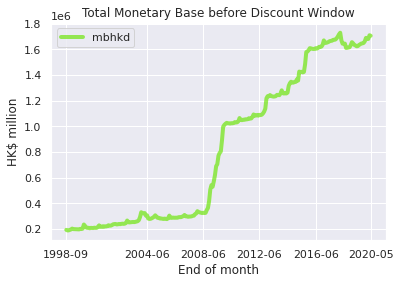

In [5]:
MM()

### 2. Total deposits & M3 (HKD)

In [6]:
# ---------------- 2. Total deposits & M3 (HKD) ----------------
def get_TD_from_HKMA():
    # Monetary Supply-Ddjusted
    url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/banking/customer-deposits-by-currency?choose=end_of_month&from=1998-09&to=no&sortby=end_of_month&sortorder=asc'

    # retrieve data from hkma api, 100 entries per call, untill every data are retrieveed
    records = []
    offset = 0
    while True:
        with urllib.request.urlopen(url+"&offset="+str(offset), context=context) as req:
            data = json.loads(req.read().decode())
            records += data['result']['records']
        if data['result']['datasize'] <= 0:
            break
        else:
            offset += 100

    # now data retrieved from hkma are stored in 'records' in a chronological order
    return records

def TDHKD():
    msa_records = get_MSA_from_HKMA()
    td_records = get_TD_from_HKMA()  # deposits_hkd

    syncLength = min(len(td_records), len(msa_records))
    td_records = td_records[:syncLength]  # deposits_hkd
    msa_records = msa_records[:syncLength]  # m3_hkd

    formatted_X = []
    formatted_tdhkd_Y = []
    formatted_m3_hkd_Y = []

    for i in range(syncLength):
        end_of_month = msa_records[i]['end_of_month']
        if(not msa_records[i]['end_of_month'] == td_records[i]['end_of_month']):
            print("something wrong here, please check")  # date sync check

        formatted_X += [end_of_month]
        formatted_m3_hkd_Y += [msa_records[i]['m3_hkd']]
        formatted_tdhkd_Y += [td_records[i]['deposits_hkd']]

    # Plot tdhkd
    plt.plot(formatted_X, formatted_tdhkd_Y, color='#F05900',
             linewidth=4, alpha=0.7, label="m3")
    plt.title("2. Total deposits (HKD)")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

    # Plot m3hkd
    plt.plot(formatted_X, formatted_m3_hkd_Y, color='#00C4C4',
             linewidth=4, alpha=0.7, label="m3")
    plt.title("M3 HKD")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

    # Plot tdhkd and m3
    plt.plot(formatted_X, formatted_tdhkd_Y, color='#F05900', label="Total deposits (HKD)")
    plt.plot(formatted_X, formatted_m3_hkd_Y, color='#00C4C4', label="M3 (HKD)")
    plt.title("Total deposits (HKD) and M3 (HKD) Correlation")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

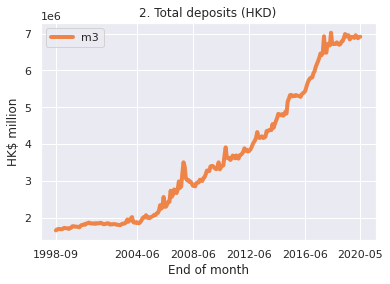

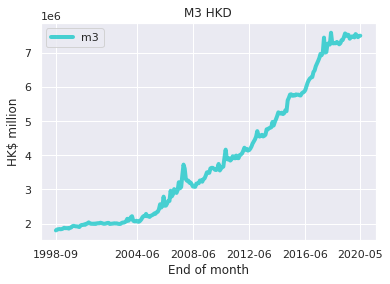

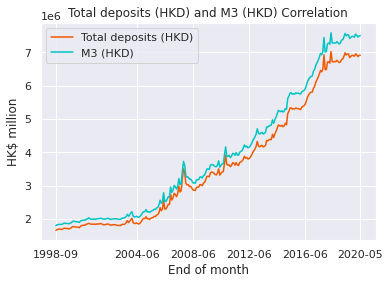

In [7]:
TDHKD()

### 3. Loan to Deposits


In [8]:
# ---------------- 3. Loan to Deposits ----------------
def get_BS_from_HKMA():
    # Balance sheet
    url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/banking/balance-sheet-ais?choose=end_of_month&from=1998-09&to=no&sortby=end_of_month&sortorder=asc'

    # retrieve data from hkma api, 100 entries per call, untill every data are retrieveed
    records = []
    offset = 0
    while True:
        with urllib.request.urlopen(url+"&offset="+str(offset), context=context) as req:
            data = json.loads(req.read().decode())
            records += data['result']['records']
        if data['result']['datasize'] <= 0:
            break
        else:
            offset += 100

    # now data retrieved from hkma are stored in 'records' in a chronological order
    return records

def LtoD_hkd():
    bs_records = get_BS_from_HKMA() 
    
    formatted_X = []
    formatted_liab_depcust_hkd = []
    formatted_asst_loanadvtocust_hkd = []
    formatted_LtoD_hkd = []
    
    for record in bs_records:
        formatted_X += [ record['end_of_month'] ]
        
        formatted_asst_loanadvtocust_hkd += [ record['asst_loanadvtocust_hkd'] ]
        formatted_liab_depcust_hkd += [ record['liab_depcust_hkd'] ]
        formatted_LtoD_hkd += [ record['asst_loanadvtocust_hkd'] / record['liab_depcust_hkd'] ]

    # Plot LtoD hkd
    plt.plot(formatted_X, formatted_LtoD_hkd, color='#E369AE', linewidth=4, alpha=1, label="LtoD (HKD)")
    plt.title("3.1. Loan to Deposits (HKD)")
    plt.xlabel("End of month")
    plt.ylabel("L to D ratio")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

    plt.plot(formatted_X, formatted_asst_loanadvtocust_hkd, color='#FFFB76', label="Loan (HKD)")
    plt.plot(formatted_X, formatted_liab_depcust_hkd, color='#F05900', label="Deposits (HKD)")
    plt.title("Loan and Deposits (HKD)")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

def LtoD_fc():
    bs_records = get_BS_from_HKMA() 
    
    formatted_X = []
    formatted_liab_depcust_fc = []
    formatted_asst_loanadvtocust_fc = []
    formatted_LtoD_fc = []

    for record in bs_records:
        formatted_X += [ record['end_of_month'] ]
        formatted_asst_loanadvtocust_fc += [ record['asst_loanadvtocust_fc'] ]
        formatted_liab_depcust_fc += [ record['liab_depcust_fc'] ]
        formatted_LtoD_fc += [ record['asst_loanadvtocust_fc'] / record['liab_depcust_fc'] ]

    # Plot LtoD fc
    plt.plot(formatted_X, formatted_LtoD_fc, color='#E369AE', linewidth=4, alpha=1, label="LtoD (FC)")
    plt.title("3.2. Loan to Deposits (FC)")
    plt.xlabel("End of month")
    plt.ylabel("L to D ratio")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

    plt.plot(formatted_X, formatted_asst_loanadvtocust_fc, color='#FFFB76', label="Loan (FC)")
    plt.plot(formatted_X, formatted_liab_depcust_fc, color='#F05900', label="Deposits (FC)")
    plt.title("Loan and Deposits (FC)")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

def LtoD_total():
    bs_records = get_BS_from_HKMA() 
    
    formatted_X = []
    formatted_liab_depcust_total = []
    formatted_asst_loanadvtocust_total = []
    formatted_LtoD_total = []
    
    for record in bs_records:
        formatted_X += [ record['end_of_month'] ]

        formatted_asst_loanadvtocust_total += [ record['asst_loanadvtocust_total'] ]
        formatted_liab_depcust_total += [ record['liab_depcust_total'] ]
        formatted_LtoD_total += [ record['asst_loanadvtocust_total'] / record['liab_depcust_total'] ]

    # Plot LtoD total
    plt.plot(formatted_X, formatted_LtoD_total, color='#E369AE', linewidth=4, alpha=1, label="LtoD (Total)")
    plt.title("3.2. Loan to Deposits (Total)")
    plt.xlabel("End of month")
    plt.ylabel("L to D ratio")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

    plt.plot(formatted_X, formatted_asst_loanadvtocust_total, color='#FFFB76', label="Loan (Total)")
    plt.plot(formatted_X, formatted_liab_depcust_total, color='#F05900', label="Deposits (Total)")
    plt.title("Loan and Deposits (Total)")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.show()

#### 3.1. Loan to Deposits (HKD)

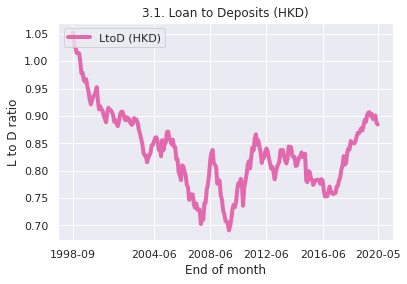

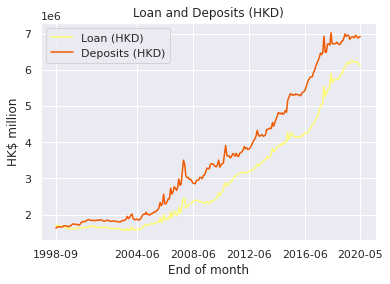

In [9]:
LtoD_hkd()

#### 3.2. Loan to Deposits (FC)

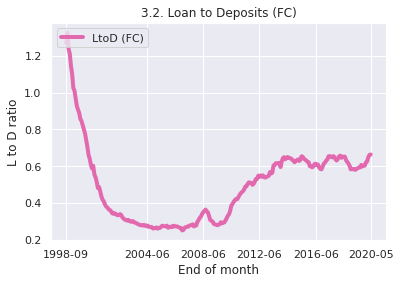

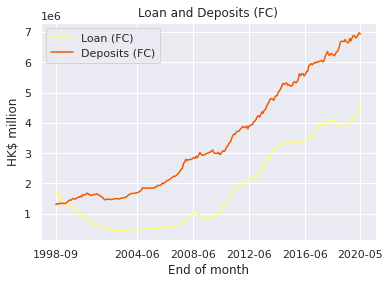

In [10]:
LtoD_fc()

#### 3.3 Loan to Deposits (Total)

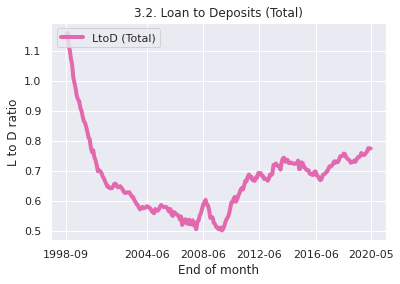

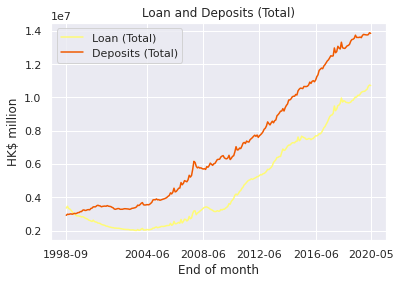

In [11]:
LtoD_total()